[0 1 2 3 4 5 6]


C:\Users\Seungwoo\AppData\Local\Temp\ipykernel_41924\1465283247.py:42: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Seungwoo\AppData\Local\Temp\ipykernel_41924\1465283247.py:42: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


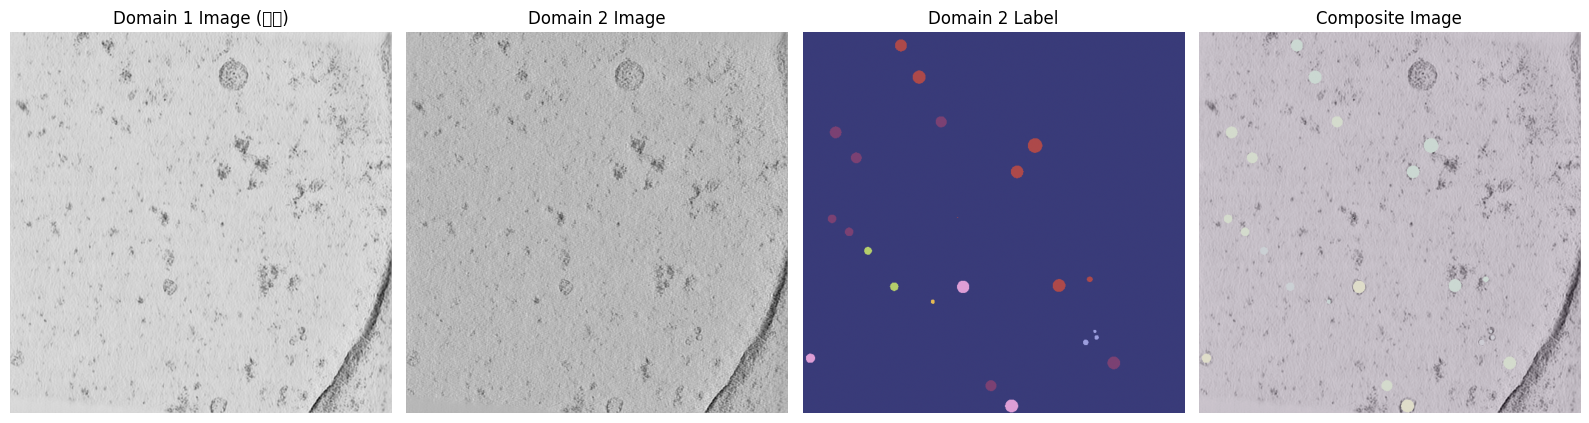

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# npy 파일 불러오기 (경로에 맞게 수정)
domain1_image = np.load("datasets/images/isonetcorrected_TS_5_4.npy")  # shape: (184, 630, 630)
domain2_image = np.load("datasets/images/denoised_TS_5_4.npy")           # shape: (184, 630, 630)
domain2_label_orig = np.load("datasets/labels/denoised_TS_5_4.npy")        # shape: (184, 630, 630)

# 배경은 도메인1 이미지로 사용하고, 도메인2 라벨(1~6) 영역에는 도메인2 이미지 값을 합성
mask = np.isin(domain2_label_orig, np.arange(1, 7))  # 도메인2 라벨이 1~6인 영역 (foreground)
print(np.unique(domain2_label_orig))

# 도메인1 이미지 복사해서 기본 배경 이미지로 사용
new_img = domain1_image.copy()
# 마스크 영역에 도메인2 이미지 값을 적용 (합성)
new_img[mask] = domain2_image[mask]

# 결과를 시각화 (예시: 100번째 슬라이스)
plt.figure(figsize=(16, 6))

plt.subplot(1, 4, 1)
plt.title("Domain 1 Image (배경)")
plt.imshow(domain1_image[100], cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Domain 2 Image")
plt.imshow(domain2_image[100], cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Domain 2 Label")
plt.imshow(domain2_label_orig[100], cmap='tab20b')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Composite Image")
plt.imshow(new_img[100], cmap='gray')
plt.imshow(domain2_label_orig[100], alpha=0.1)
plt.axis("off")

plt.tight_layout()
plt.show()
